In [48]:
# let's set up our environment

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [49]:
# import the mnist dataset
from sklearn.datasets import fetch_mldata
mnist  = fetch_mldata('MNIST original', data_home='.')

Xtr = mnist['data']
Ytr = mnist['target']

In [50]:
# we are going to start easy

num_labels = 3

num_examples_per_label = 3

num_pixels = 28*28

# innitialize a matrix to store our data
X = np.zeros((num_examples_per_label*num_labels, num_pixels))

for label in range(num_labels):
        num_pics_selected = 0
        pic_label = 0
        while num_pics_selected < num_examples_per_label:
            if Ytr[pic_label] == label:
                X[num_pics_selected + label*num_examples_per_label] = Xtr[pic_label]
                num_pics_selected +=1
            pic_label +=1

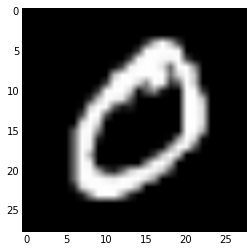

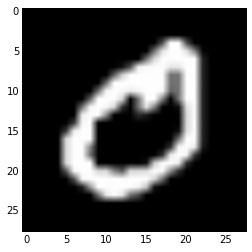

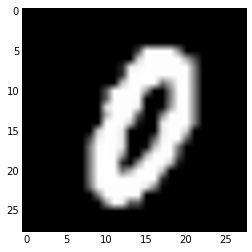

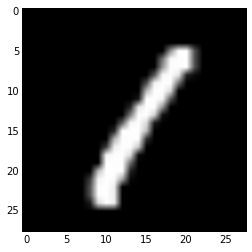

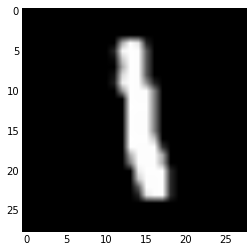

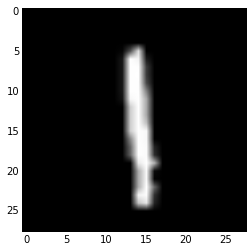

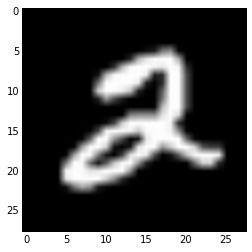

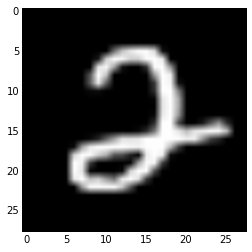

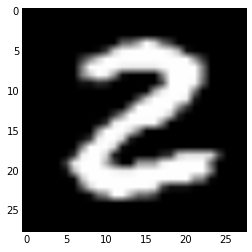

In [51]:
for picture in range(num_examples_per_label*num_labels):
    plt.imshow(X[picture].reshape(28,28), cmap = 'Greys_r')
    plt.show()

In [52]:
# Here wil set up the parameters for our neural network
N = 3 # number of points per class
D = 28*28 #Dimensionality of each datapoint
K = 3 # Number of classes
num_examples = N*K

# hyperparameter
learning_rate = 0.0000001

## Our data is ready:
# I have data in X, but I don't have y
y = np.array([0,0,0,1,1,1,2,2,2])

# To train a neural network, the first step is to initialize the
# Weght matrix, which in this case will have shape
# K by D
W = 0.01 * np.random.randn(D,K)
# We also need to initialize the boas vector
b = np.zeros((1,K))

for iteration in range(10000):
    # as sanity chec, print the shapes for W and X, and make sure you can do
    # operations with them.
    # print W.shape, X.shape, b.shape

    # let's carry out the forward pass through the softmax activation
    scores = np.dot(X, W) + b

    # print scores

    # we can pass our scores matrix through our activation function
    # in this case it will be softmax
    probs = np.exp(scores)/np.sum(np.exp(scores),axis = 1, keepdims = True)
    # print scores
    # print probs

    # compute the loss (this is also called the cross-entropy loss)
    correct_probs = probs[range(num_examples),y]
    # print range(num_examples)
    # print probs
    # print correct_probs
    correct_log_probs = -np.log(correct_probs)
    loss = np.sum(correct_log_probs)/num_examples
    if iteration % 1000 == 0:
        print 'the current loss, at iteration %d is: ' % iteration, loss 

    # WARNING: This might be tricky, math, but we'll explain it tomorrow
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores = dscores / num_examples

    # backpropagate to W and b
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis = 0, keepdims = True)

    # This is where magic happens
    W = W - learning_rate * dW
    b = b - learning_rate * db


the current loss, at iteration 0 is:  22.7922389343
the current loss, at iteration 1000 is:  0.00861902479401
the current loss, at iteration 2000 is:  0.00433020945003
the current loss, at iteration 3000 is:  0.0029349414959
the current loss, at iteration 4000 is:  0.0022296756747
the current loss, at iteration 5000 is:  0.00180113854027
the current loss, at iteration 6000 is:  0.00151228099807
the current loss, at iteration 7000 is:  0.00130403750816
the current loss, at iteration 8000 is:  0.00114663858691
the current loss, at iteration 9000 is:  0.0010234103663


In [53]:
# evaluate the performance of the current weight matrix:

scores = np.dot(X,W) + b

# compute the class probabilities
probs = np.exp(scores) / np.sum(np.exp(scores),axis = 1, keepdims = True)

prediction = np.argmax(probs, axis = 1)
accuracy = np.mean(prediction == y)
print 'training accuracy is ', accuracy

training accuracy is  1.0


(784, 3)


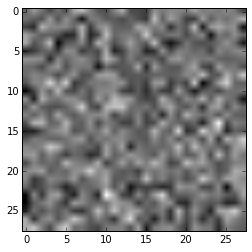

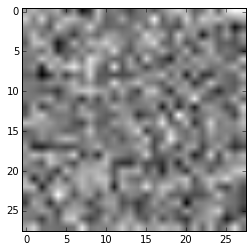

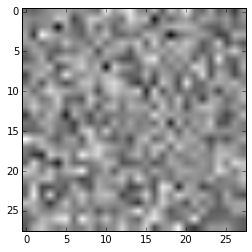

In [54]:
print W.shape

for i in range(K):
    plt.imshow(W.T[i].reshape(28,28),cmap = plt.get_cmap('gray'))
    plt.show()